In [4]:
import pandas as pd
import glob
import os 

paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
el_cluster_history = []

for i, path in enumerate(paths):
    df = pd.read_csv(path)
    filename = os.path.basename(path).replace('.csv', '')

    el_row = df[df['symbol'] == 'EL']

    if not el_row.empty:
        cluster = int(el_row['cluster'].values[0])
        el_cluster_history.append((filename, cluster))

el_cluster_df = pd.DataFrame(el_cluster_history, columns=['Quarter', 'Cluster'])
print(el_cluster_df)

             Quarter  Cluster
0   2021_Q3_clusters        9
1   2021_Q4_clusters        3
2   2022_Q1_clusters       15
3   2022_Q2_clusters        7
4   2022_Q3_clusters        9
5   2022_Q4_clusters        3
6   2023_Q1_clusters        9
7   2023_Q2_clusters       13
8   2023_Q3_clusters       13
9   2023_Q4_clusters       12
10  2024_Q1_clusters        0
11  2024_Q2_clusters       10
12  2024_Q3_clusters       12
13  2024_Q4_clusters        8


In [7]:
import glob

paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
el_peers = {}

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    if 'EL' in df['symbol'].values:
        el_cluster = df[df['symbol'] == 'EL']['cluster'].values[0]
        peers = df[df['cluster'] == el_cluster]['symbol'].tolist()
        el_peers[quarter] = peers

# Example: show cluster peers for 2024_Q4
print(f"Peers of EL in 2024_Q4:\n{el_peers['2024_Q4']}")
print(f"Peers of EL in 2024_Q3:\n{el_peers['2024_Q3']}")
print(f"Peers of EL in 2024_Q2:\n{el_peers['2024_Q2']}")
print(f"Peers of EL in 2024_Q1:\n{el_peers['2024_Q1']}")

Peers of EL in 2024_Q4:
['INVH', 'KDP', 'WBD', 'CRL', 'STE', 'DD', 'DOW', 'ATO', 'CE', 'KEYS', 'ARE', 'DLR', 'UDR', 'EQIX', 'HSIC', 'GM', 'ABBV', 'HUM', 'PSX', 'BWA', 'TT', 'PM', 'EL', 'VTRS', 'INTU', 'PNW', 'BEN', 'PARA', 'BALL', 'HAS', 'CAG', 'WBA', 'INTC', 'CI', 'IFF', 'BAX', 'CPB', 'CSX', 'IP', 'OXY', 'PPG']
Peers of EL in 2024_Q3:
['WDAY', 'CRWD', 'PANW', 'AXON', 'PODD', 'FSLR', 'INVH', 'ON', 'NDSN', 'BRO', 'DAY', 'MTCH', 'TECH', 'MRNA', 'CRL', 'PTC', 'TRMB', 'ENPH', 'TSLA', 'TDY', 'TYL', 'DXCM', 'IR', 'STE', 'ZBRA', 'NOW', 'IEX', 'DD', 'WAB', 'ATO', 'TFX', 'CDNS', 'ANSS', 'AMD', 'COO', 'FTV', 'TDG', 'AJG', 'DLR', 'GPN', 'HOLX', 'EXR', 'NWS', 'PYPL', 'O', 'EQIX', 'SWKS', 'MLM', 'AME', 'NWSA', 'PNR', 'XYL', 'FCX', 'FMC', 'VTR', 'WELL', 'CRM', 'IVZ', 'CTRA', 'ISRG', 'ICE', 'AKAM', 'AIZ', 'FIS', 'CME', 'JNPR', 'KIM', 'EL', 'PSA', 'TMO', 'VTRS', 'BIIB', 'PRU', 'ZBH', 'FI', 'SYK', 'A', 'ADI', 'VMC', 'DHR', 'COF', 'EFX', 'SCHW', 'BSX', 'MU', 'IPG', 'LIN', 'GL', 'MMC', 'MDT', 'RVTY', 'NU

In [10]:
import pandas as pd
import glob
import os
from collections import Counter

# Load all cluster-labeled files
paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))

el_peers = {}
all_peers = []

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    if 'EL' in df['symbol'].values:
        el_cluster = df[df['symbol'] == 'EL']['cluster'].values[0]
        peers = df[df['cluster'] == el_cluster]['symbol'].tolist()
        el_peers[quarter] = peers

        # Add all peers except EL herself
        all_peers += [p for p in peers if p != 'EL']

# Count how many times each stock was a peer of EL
peer_counts = Counter(all_peers)

# Sort and print
print("Stocks most frequently clustered with EL:")
for symbol, count in peer_counts.most_common():
    print(f"{symbol}: {count} times")

# Optional: Show only peers who were clustered with EL at least 4 times
print("\n Peers clustered with EL 4+ times:")
for symbol, count in peer_counts.items():
    if count >= 4:
        print(f"{symbol}: {count}")


Stocks most frequently clustered with EL:
DD: 8 times
IFF: 8 times
TFX: 7 times
NWS: 7 times
EQIX: 7 times
NWSA: 7 times
DXCM: 6 times
PNR: 6 times
FCX: 6 times
BF-B: 6 times
WY: 6 times
ABT: 6 times
PTC: 6 times
IR: 6 times
ZBH: 6 times
ADI: 6 times
VMC: 6 times
BSX: 6 times
RVTY: 6 times
NEM: 6 times
CRM: 6 times
PODD: 5 times
ON: 5 times
NDSN: 5 times
TECH: 5 times
GNRC: 5 times
ENPH: 5 times
IEX: 5 times
KEYS: 5 times
HOLX: 5 times
MLM: 5 times
APH: 5 times
A: 5 times
ROK: 5 times
BAX: 5 times
PFE: 5 times
INVH: 5 times
BRO: 5 times
TRMB: 5 times
TYL: 5 times
WAB: 5 times
HWM: 5 times
AME: 5 times
JNPR: 5 times
BIIB: 5 times
SYK: 5 times
PNW: 5 times
MDT: 5 times
STE: 5 times
COO: 5 times
DLR: 5 times
O: 5 times
SCHW: 5 times
BDX: 5 times
DHR: 5 times
CRL: 5 times
VTRS: 5 times
AXON: 4 times
FDS: 4 times
TSLA: 4 times
FOX: 4 times
FOXA: 4 times
PYPL: 4 times
SWKS: 4 times
AVGO: 4 times
NFLX: 4 times
ISRG: 4 times
AKAM: 4 times
AIZ: 4 times
PSA: 4 times
TMO: 4 times
TXN: 4 times
BEN

In [13]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

el_top_peers = ['DD', 'IFF', 'TFX', 'NWS', 'EQIX', 'NWSA', 'DXCM', 'PNR', 'FCX', 'BF-B']

# Step 1: Define your metrics and symbols
metrics = [
    'returnOnEquity', 'netProfitMargin',
    'priceEarningsRatio', 'freeCashFlowPerShare',
    'currentRatio', 'quickRatio'
]

symbols_to_track = ['EL'] + el_top_peers

# Step 2: Load cluster-labeled CSVs
paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
idx = [os.path.basename(p).replace('.csv', '').replace('_clusters', '') for p in paths]

results = []

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    for symbol in symbols_to_track:
        row = df[df['symbol'] == symbol]
        if not row.empty:
            entry = {'symbol': symbol, 'quarter': quarter}
            for m in metrics:
                entry[m] = row[m].values[0]
            results.append(entry)

# Step 3: Convert to long DataFrame
comparison_df = pd.DataFrame(results)


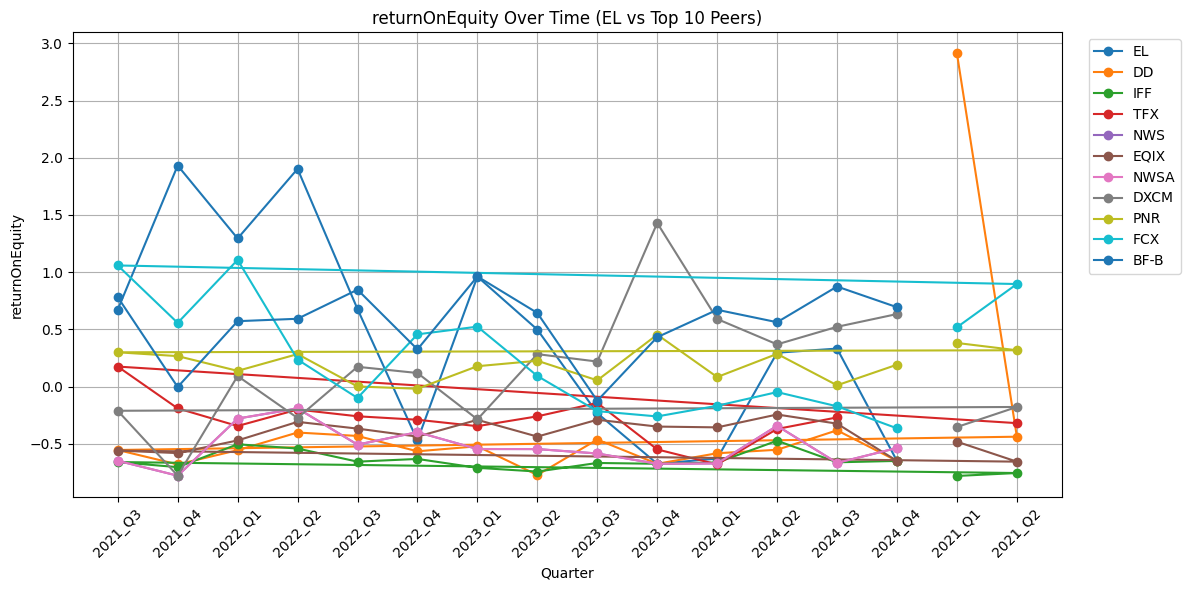

In [14]:
metric = 'returnOnEquity'

plt.figure(figsize=(12, 6))

for symbol in symbols_to_track:
    df = comparison_df[comparison_df['symbol'] == symbol]
    plt.plot(df['quarter'], df[metric], marker='o', label=symbol)

plt.title(f"{metric} Over Time (EL vs Top 10 Peers)")
plt.xlabel("Quarter")
plt.ylabel(metric)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()
